This notebook is a primer on graph theory and the use of the `networkx` package in python to build and analyze graphs.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(127)

# Graph Theory

A *graph* (or *network*) $G$ consists of a set of *verticies* (or *nodes*) $V=\{v_1 \dots v_n\}$ and set of *edges* (or *links*) $E = \{e_1 \dots e_m\} \subseteq {V \choose 2}$ connecting pairs of verticies. The sizes of these sets are respectively measured as $\|V\| = n$ and $\|E\| = m$. Generally, graphs do not contain verticies with edges to themselves.

This is how you make a graph. 

In [2]:
G = nx.Graph()

These are the ways to add nodes. While the mathematical definition of a graph doesn't contain extra information, it's possible to add annotations to a node through either the keyword arguments or with a dict.

In [3]:
G.add_node(1)
G.add_nodes_from([2, 3, 4, 5])

G.add_node(6, note='foo')  # using **kwargs
G.add_node(7, {'note': 'bar'})  # using attribute dictionary

This is how you add edges, including edges with annotations.

In [4]:
G.add_edge(1, 2)

edge = (2, 3)
G.add_edge(*edge)  # unpacking a tuple

G.add_edge(6, 7, note='baz')
G.add_edge(5, 6, {'note': 'bum'})

G.add_edges_from([(1, 3), (3, 4), (2, 5)])

# Drawing

Graphs are a powerful took for analyzing high dimensional datasets because they can be easily displayed in 2D. The `networkx` package makes use of the `matplotlib` graphical package to make beautiful drawings.

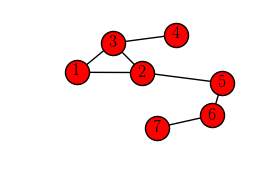

In [5]:
plt.figure(figsize=(2, 1.3))  # changes size of figure
nx.draw(G, with_labels=True)

There are multiple algorithms implemented in `networkx` for positioning nodes. This is an example how to draw a graph with different layouts on multiple subplots and multiple axes. There are many additional options the `nx.draw` [documentation](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html).

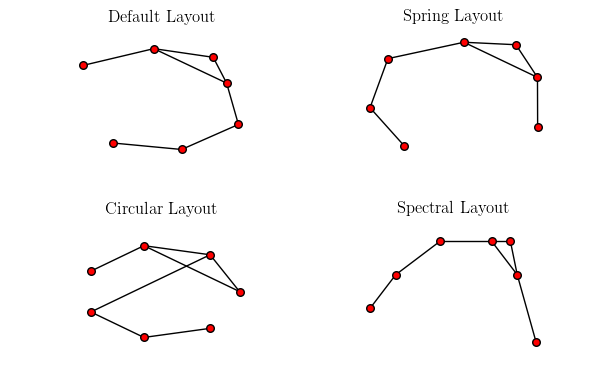

In [6]:
fig, axes = plt.subplots(2, 2)

axes[0, 0].set_title("Default Layout")
nx.draw(G, ax=axes[0, 0], node_size=30)

axes[0, 1].set_title("Spring Layout")
nx.draw_spring(G, ax=axes[0, 1], node_size=30)

axes[1, 0].set_title("Circular Layout")
nx.draw_circular(G, ax=axes[1, 0], node_size=30)

axes[1, 1].set_title("Spectral Layout")
nx.draw_spectral(G, ax=axes[1, 1], node_size=30)

plt.tight_layout()
plt.show()

# Manipulating Data

There are many ways to access the data in a `networkx` graph, including its length, its nodes, and the annotations associated with each node.

In [7]:
len(G)

7

In [8]:
G.nodes()

[1, 2, 3, 4, 5, 6, 7]

In [9]:
G.nodes(data=True)  # returns list of (node, data) pairs

[(1, {}),
 (2, {}),
 (3, {}),
 (4, {}),
 (5, {}),
 (6, {'note': 'foo'}),
 (7, {'note': 'bar'})]

In [10]:
G.node[6]  # G.node is a dictionary from {node: data}

{'note': 'foo'}

The neighborhood of vertex $u$ is defined as the set of all verticies connected to $u$ such that $N(u) = \{v \mid \{u,v\} \in E\}$. The degree of vertex $u$ is defined as the size of its neighborhood such that $deg(u) = \|N(u)\|$. The `networkx` package allows for access to its edges and the neighborhood around a given node in multiple ways.

In [11]:
G.neighbors(6)

[5, 7]

In [12]:
G[6]  # G is a dictionary from {node: {neighbor: attributes}}

{5: {'note': 'bum'}, 7: {'note': 'baz'}}

In [13]:
G.edge[6][5]

{'note': 'bum'}

In [14]:
G.edges()

[(1, 2), (1, 3), (2, 3), (2, 5), (3, 4), (5, 6), (6, 7)]

Once created, the data within a graph can be edited.

In [15]:
G.edge[6][5]['new-node'] = 'bam'

These are alternate ways to build graphs from different data structures

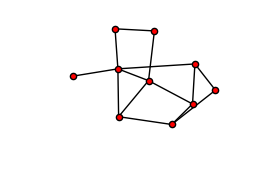

In [16]:
adj = np.random.normal(size=(10, 10)) > 0.80
H = nx.from_numpy_matrix(adj)

plt.figure(figsize=(2, 1.3))
nx.draw(H, node_size=20)

# Analysis of Graphs

The clustering coefficient of a vertex describes how connected its neighbors are. Vertex $u$ has $deg(u)$ neighbors, so there can be a maximum of ${deg(u) \choose 2}$ edges between them. The actual number of edges between the neighbors of vertex $u$ can be counted with as $\sum_{\{u,v_1\}, \{u,v_2\} \in E} 1[\{v_1, v_2\} \in E]$. The clustering coefficient is defined as the ratio between the actual and maximum number of intra-neighbor edges. The average clustering coefficient over all nodes in a network is important to describe its topology. 

In [17]:
nx.clustering(G, 1)

1.0

In [18]:
nx.clustering(G, G.nodes())

{1: 1.0,
 2: 0.3333333333333333,
 3: 0.3333333333333333,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0}

In [19]:
nx.average_clustering(G)

0.23809523809523808

A path is a sequence of verticies without duplicates, while a walk is a sequence of verticies that may contain duplicates. The characteristic path length is the average length of the shortest path between all pairs of nodes.

In [20]:
nx.shortest_path(G, 1, 4)

[1, 3, 4]

Betweenness and centrality are two more common node descriptors. Additionally, networks can be assessed for their diameter, modularity, etc. These algorithms can be found in the [algorithms reference](https://networkx.github.io/documentation/networkx-1.10/reference/algorithms.html)

# Network Science

The degree distribution, characteristic path length, and clustering coefficient give insight to the topology of a network. Three models for generating random graphs of certain characteristics are introduced because of their relevance to biological networks

In [21]:
def draw_network_example(G, title):
    fig, (l_axis, r_axis) = plt.subplots(1, 2)

    #l_axis.set_title("Visualization")
    pos = nx.spring_layout(G, iterations=150, k=(2 / len(G)))
    nx.draw_networkx(G, pos=pos, node_size=30, ax=l_axis, with_labels=False, alpha=0.8)
    l_axis.axis('off')
    
    r_axis.set_title("Degree Distribution")
    r_axis.set_xlabel("Degree")
    r_axis.set_ylabel("Frequency")
    deg_seq = list(G.degree().values())
    r_axis.hist(deg_seq, bins=max(deg_seq))

    fig.suptitle("{}".format(title), fontsize=16)
    plt.tight_layout(pad=3.0)
    plt.show()

## Erdös-Rényi Model: Binomial Networks 

Binomial networks of $n$ verticies are built by connecting each possible pair with probability $p$. The probability of vertex $u$ having degree $k$ is binomially distributed with $P(deg(u)=k)={n-1 \choose k}p^k(1-p)^{n-1-k}$. The overall degree distribution $P_k$ follows a Poisson distribution  with $\lambda = (n - 1)p$. The characteristic path length of a binomial network is proportional to the number of nodes with $L \sim \log n$. In a binomial network, the clustering coefficient of a vertex is not dependent on its degree.

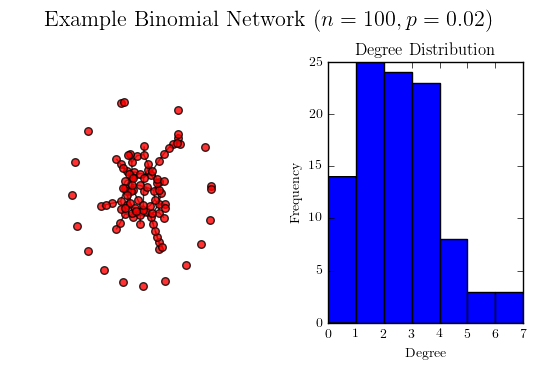

In [22]:
n, p = 100, 0.020
ern = nx.erdos_renyi_graph(n, p) 
draw_network_example(ern, 'Example Binomial Network $(n={}, p={})$'.format(n, p))

## Watts and Strogatz Model: Small World Networks

Ring lattice networks of $n$ verticies and order $k$ are built by connecting a cycle of all $n$ nodes, then connecting all nodes within distance of $k$. Small world networks are built by rewiring ring-lattice-like networks with edge rewiring probability $\phi$. These networks have a shorter characteristic path length and a higher clustering coefficient than binomial networks. Film-actor networks and the neural network in C. Elegans both show small world topology. As $\phi$ approaches 1, small world networks tend towards binomial networks.

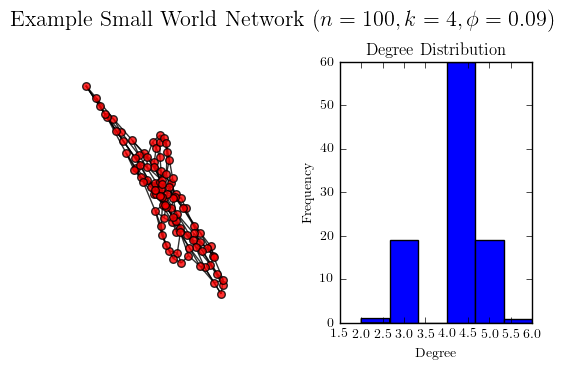

In [23]:
n, k, p = 100, 4, 0.09
ern = nx.watts_strogatz_graph(n, k, p)
draw_network_example(ern, 'Example Small World Network $(n={}, k={}, \phi={})$'.format(n, k, p))

## Barabási–Albert Model: Scale-Free Networks

Scale-free networks are characterized by having a power-law degree distribution $P_k \sim k^{-\gamma}$. In these networks, there are a few highly connected hub nodes. As a result, the characteristic path length is incredibly small, with $L \sim \log \log n$. These networks are generated with the 'rich get richer' algorithm, where highly connected nodes are more likely to have new nodes connected as they are added to the graph. The Barabási-Albert generation procedure adds $m$ edges with each new node. Many biological networks, such as protein-protein interaction networks, have scale-free topologies with $2 < \gamma < 3$.

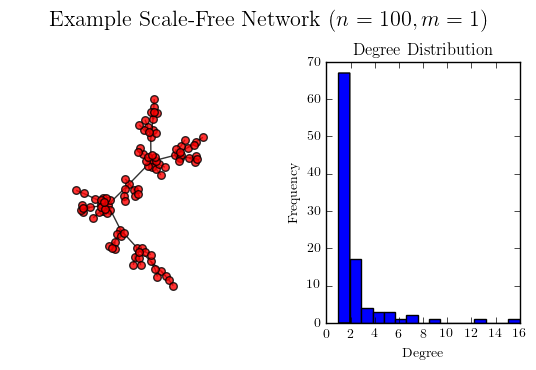

In [24]:
n, m = 100, 1
ern = nx.barabasi_albert_graph(n, m)
draw_network_example(ern, 'Example Scale-Free Network $(n={}, m={})$'.format(n, m))